In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 27.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's de

In [2]:
from numpy import *
from matplotlib.pyplot import *
from scipy.ndimage import gaussian_filter1d

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, noise, AerSimulator
from qiskit_aer.noise import depolarizing_error, NoiseModel, pauli_error
from qiskit.quantum_info import state_fidelity, Statevector, DensityMatrix, partial_trace

# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService

# Loading your IBM Quantum account(s)
provider = QiskitRuntimeService(channel="ibm_quantum", token="786ab83c1f9b5535280b9414b2ba912efd79cf4264ccabab0982b47ca2fa4a9460f8994e175a00654be48b678cdbbb65d5a7276a8a0e36edbc761fcf22016aa6")

qiskit_runtime_service.__init__:INFO:2024-10-08 10:35:31,151: Default instance: ibm-q/open/main


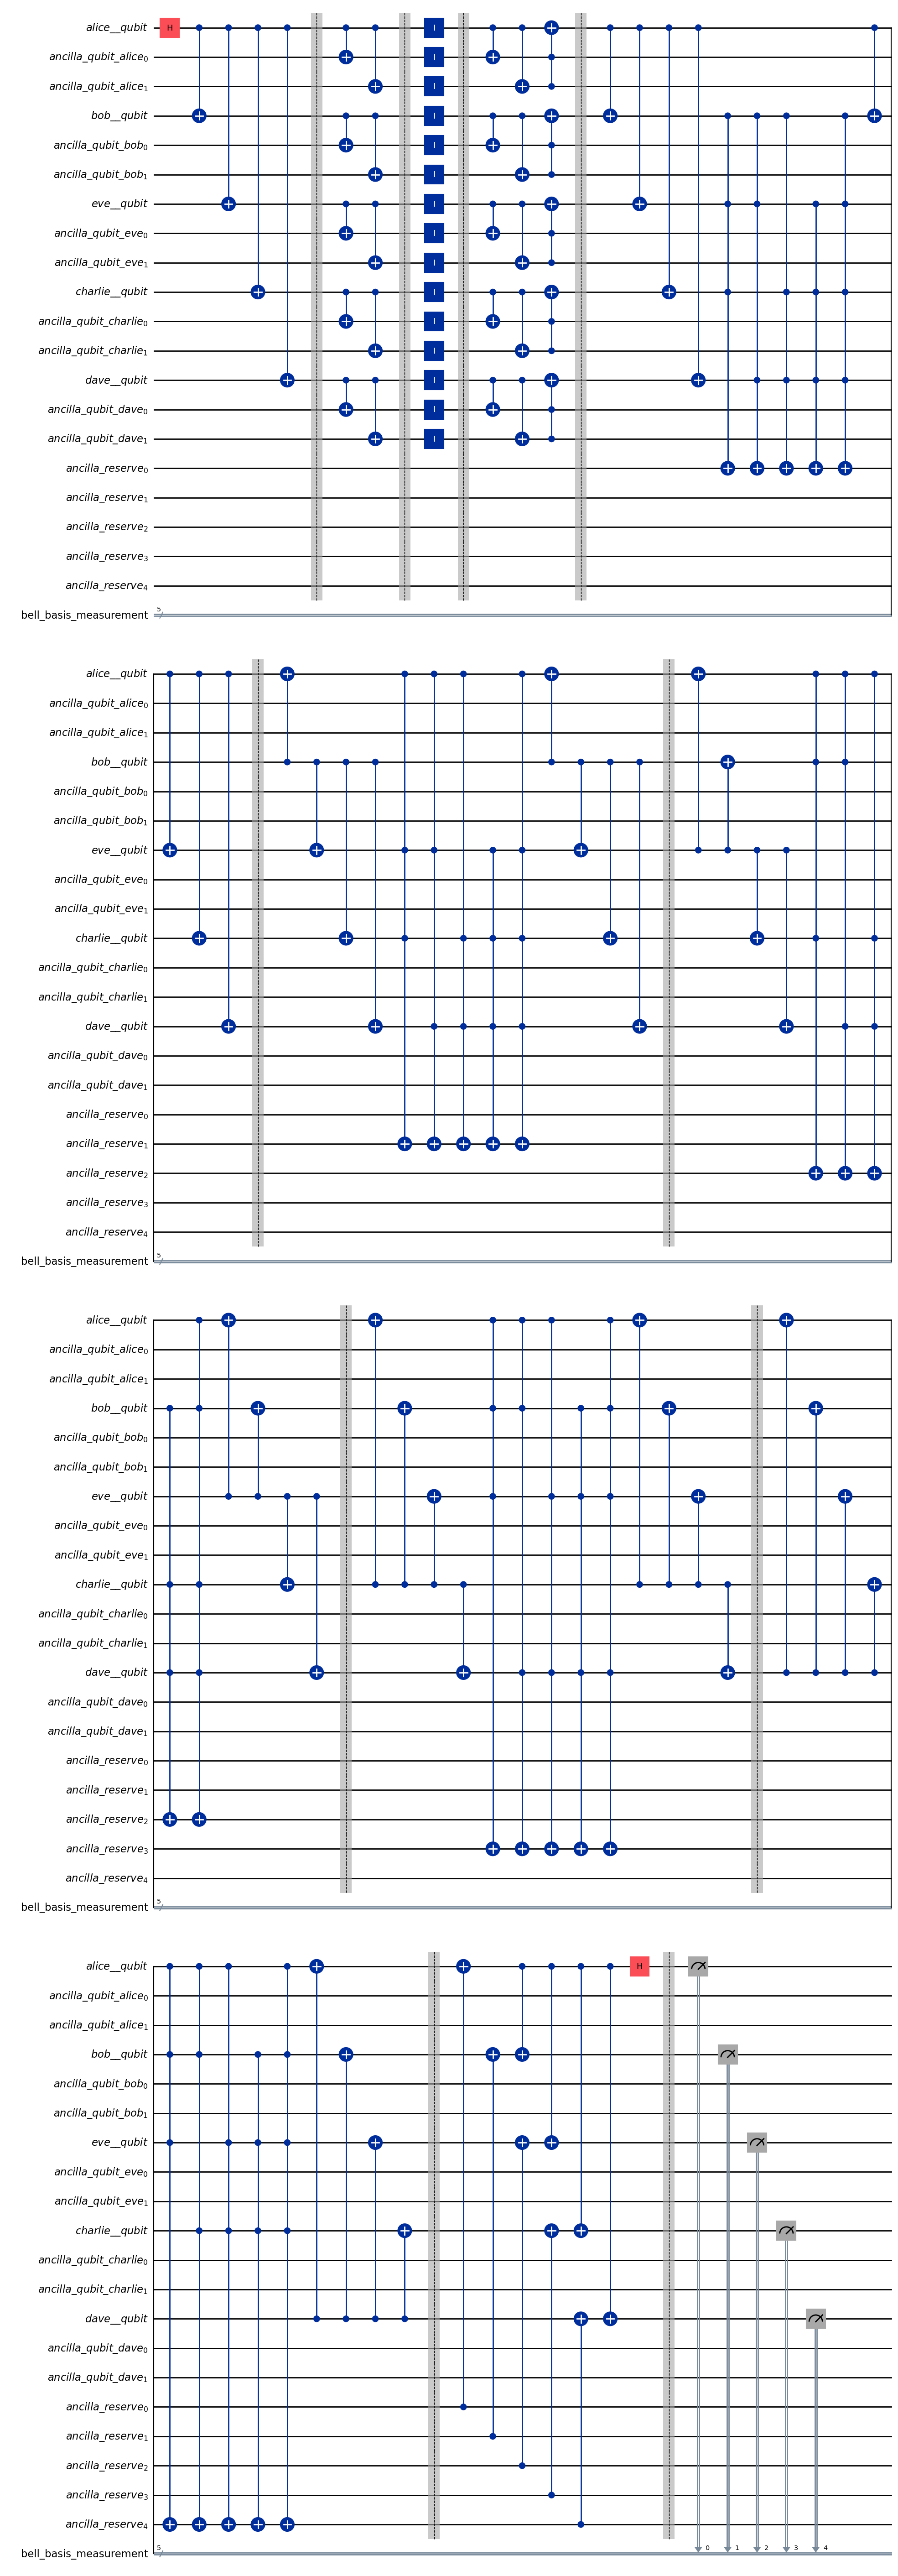

In [8]:
cr= ClassicalRegister(5,"bell_basis_measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
charlie= QuantumRegister(1, 'charlie__qubit')
dave= QuantumRegister(1, 'dave__qubit')
aq1= QuantumRegister(2, 'ancilla_qubit_alice')
aq2= QuantumRegister(2,'ancilla_qubit_bob')
aq3= QuantumRegister(2,'ancilla_qubit_eve')
aq4= QuantumRegister(2,'ancilla_qubit_charlie')
aq5= QuantumRegister(2,'ancilla_qubit_dave')
aq6= QuantumRegister(5,'ancilla_reserve')

repetition3 = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,charlie,aq4,dave,aq5,aq6,cr)

repetition3.h(alice)
repetition3.cx(alice,bob)
repetition3.cx(alice,eve)
repetition3.cx(alice,charlie)
repetition3.cx(alice,dave)

repetition3.barrier()
repetition3.cx(alice, aq1)
repetition3.cx(bob, aq2)
repetition3.cx(eve, aq3)
repetition3.cx(charlie, aq4)
repetition3.cx(dave, aq5)

repetition3.barrier()

repetition3.id(range(repetition3.num_qubits-5))
repetition3.barrier()

repetition3.cx(alice, aq1)
repetition3.cx(bob, aq2)
repetition3.cx(eve, aq3)
repetition3.cx(charlie, aq4)
repetition3.cx(dave, aq5)

repetition3.mcx([1,2],0)
repetition3.mcx([4,5],3)
repetition3.mcx([7,8],6)
repetition3.mcx([10,11],9)
repetition3.mcx([13,14],12)
repetition3.barrier()

repetition3.cx(alice,bob)
repetition3.cx(alice,eve)
repetition3.cx(alice,charlie)
repetition3.cx(alice,dave)
repetition3.mcx([bob, eve, charlie], aq6[0])
repetition3.mcx([bob, eve, dave], aq6[0])
repetition3.mcx([bob, dave, charlie], aq6[0])
repetition3.mcx([dave, eve, charlie], aq6[0])
repetition3.mcx([bob, eve, charlie, dave], aq6[0])
repetition3.cx(alice,bob)
repetition3.cx(alice,eve)
repetition3.cx(alice,charlie)
repetition3.cx(alice,dave)
repetition3.barrier()

repetition3.cx(bob,alice)
repetition3.cx(bob,eve)
repetition3.cx(bob,charlie)
repetition3.cx(bob,dave)
repetition3.mcx([alice, eve, charlie], aq6[1])
repetition3.mcx([alice, eve, dave], aq6[1])
repetition3.mcx([alice, charlie, dave], aq6[1])
repetition3.mcx([dave, eve, charlie], aq6[1])
repetition3.mcx([alice, eve, charlie,dave], aq6[1])
repetition3.cx(bob,alice)
repetition3.cx(bob,eve)
repetition3.cx(bob,charlie)
repetition3.cx(bob,dave)
repetition3.barrier()

repetition3.cx(eve,alice)
repetition3.cx(eve,bob)
repetition3.cx(eve,charlie)
repetition3.cx(eve,dave)
repetition3.mcx([alice, bob, charlie], aq6[2])
repetition3.mcx([alice, bob, dave], aq6[2])
repetition3.mcx([alice, dave, charlie], aq6[2])
repetition3.mcx([dave, bob, charlie], aq6[2])
repetition3.mcx([alice, bob, charlie, dave], aq6[2])
repetition3.cx(eve,alice)
repetition3.cx(eve,bob)
repetition3.cx(eve,charlie)
repetition3.cx(eve,dave)
repetition3.barrier()

repetition3.cx(charlie,alice)
repetition3.cx(charlie,bob)
repetition3.cx(charlie,eve)
repetition3.cx(charlie,dave)
repetition3.mcx([alice, bob, eve], aq6[3])
repetition3.mcx([alice, bob, dave], aq6[3])
repetition3.mcx([alice, dave, eve], aq6[3])
repetition3.mcx([dave, bob, eve], aq6[3])
repetition3.mcx([alice, bob, eve, dave], aq6[3])
repetition3.cx(charlie,alice)
repetition3.cx(charlie,bob)
repetition3.cx(charlie,eve)
repetition3.cx(charlie,dave)
repetition3.barrier()

repetition3.cx(dave,alice)
repetition3.cx(dave,bob)
repetition3.cx(dave,eve)
repetition3.cx(dave,charlie)
repetition3.mcx([alice, bob, eve], aq6[4])
repetition3.mcx([alice, bob, charlie], aq6[4])
repetition3.mcx([alice, charlie, eve], aq6[4])
repetition3.mcx([charlie, bob, eve], aq6[4])
repetition3.mcx([alice, bob, eve, charlie], aq6[4])
repetition3.cx(dave,alice)
repetition3.cx(dave,bob)
repetition3.cx(dave,eve)
repetition3.cx(dave,charlie)
repetition3.barrier()

repetition3.cx(aq6[0],alice)
repetition3.cx(aq6[1],bob)
repetition3.cx(aq6[2],eve)
repetition3.cx(aq6[3],charlie)
repetition3.cx(aq6[4],dave)
repetition3.cx(alice,bob)
repetition3.cx(alice,eve)
repetition3.cx(alice,charlie)
repetition3.cx(alice,dave)
repetition3.h(alice)
repetition3.barrier()

repetition3.measure([alice[0], bob[0], eve[0],charlie[0],dave[0]],cr)
repetition3.draw(output='mpl')

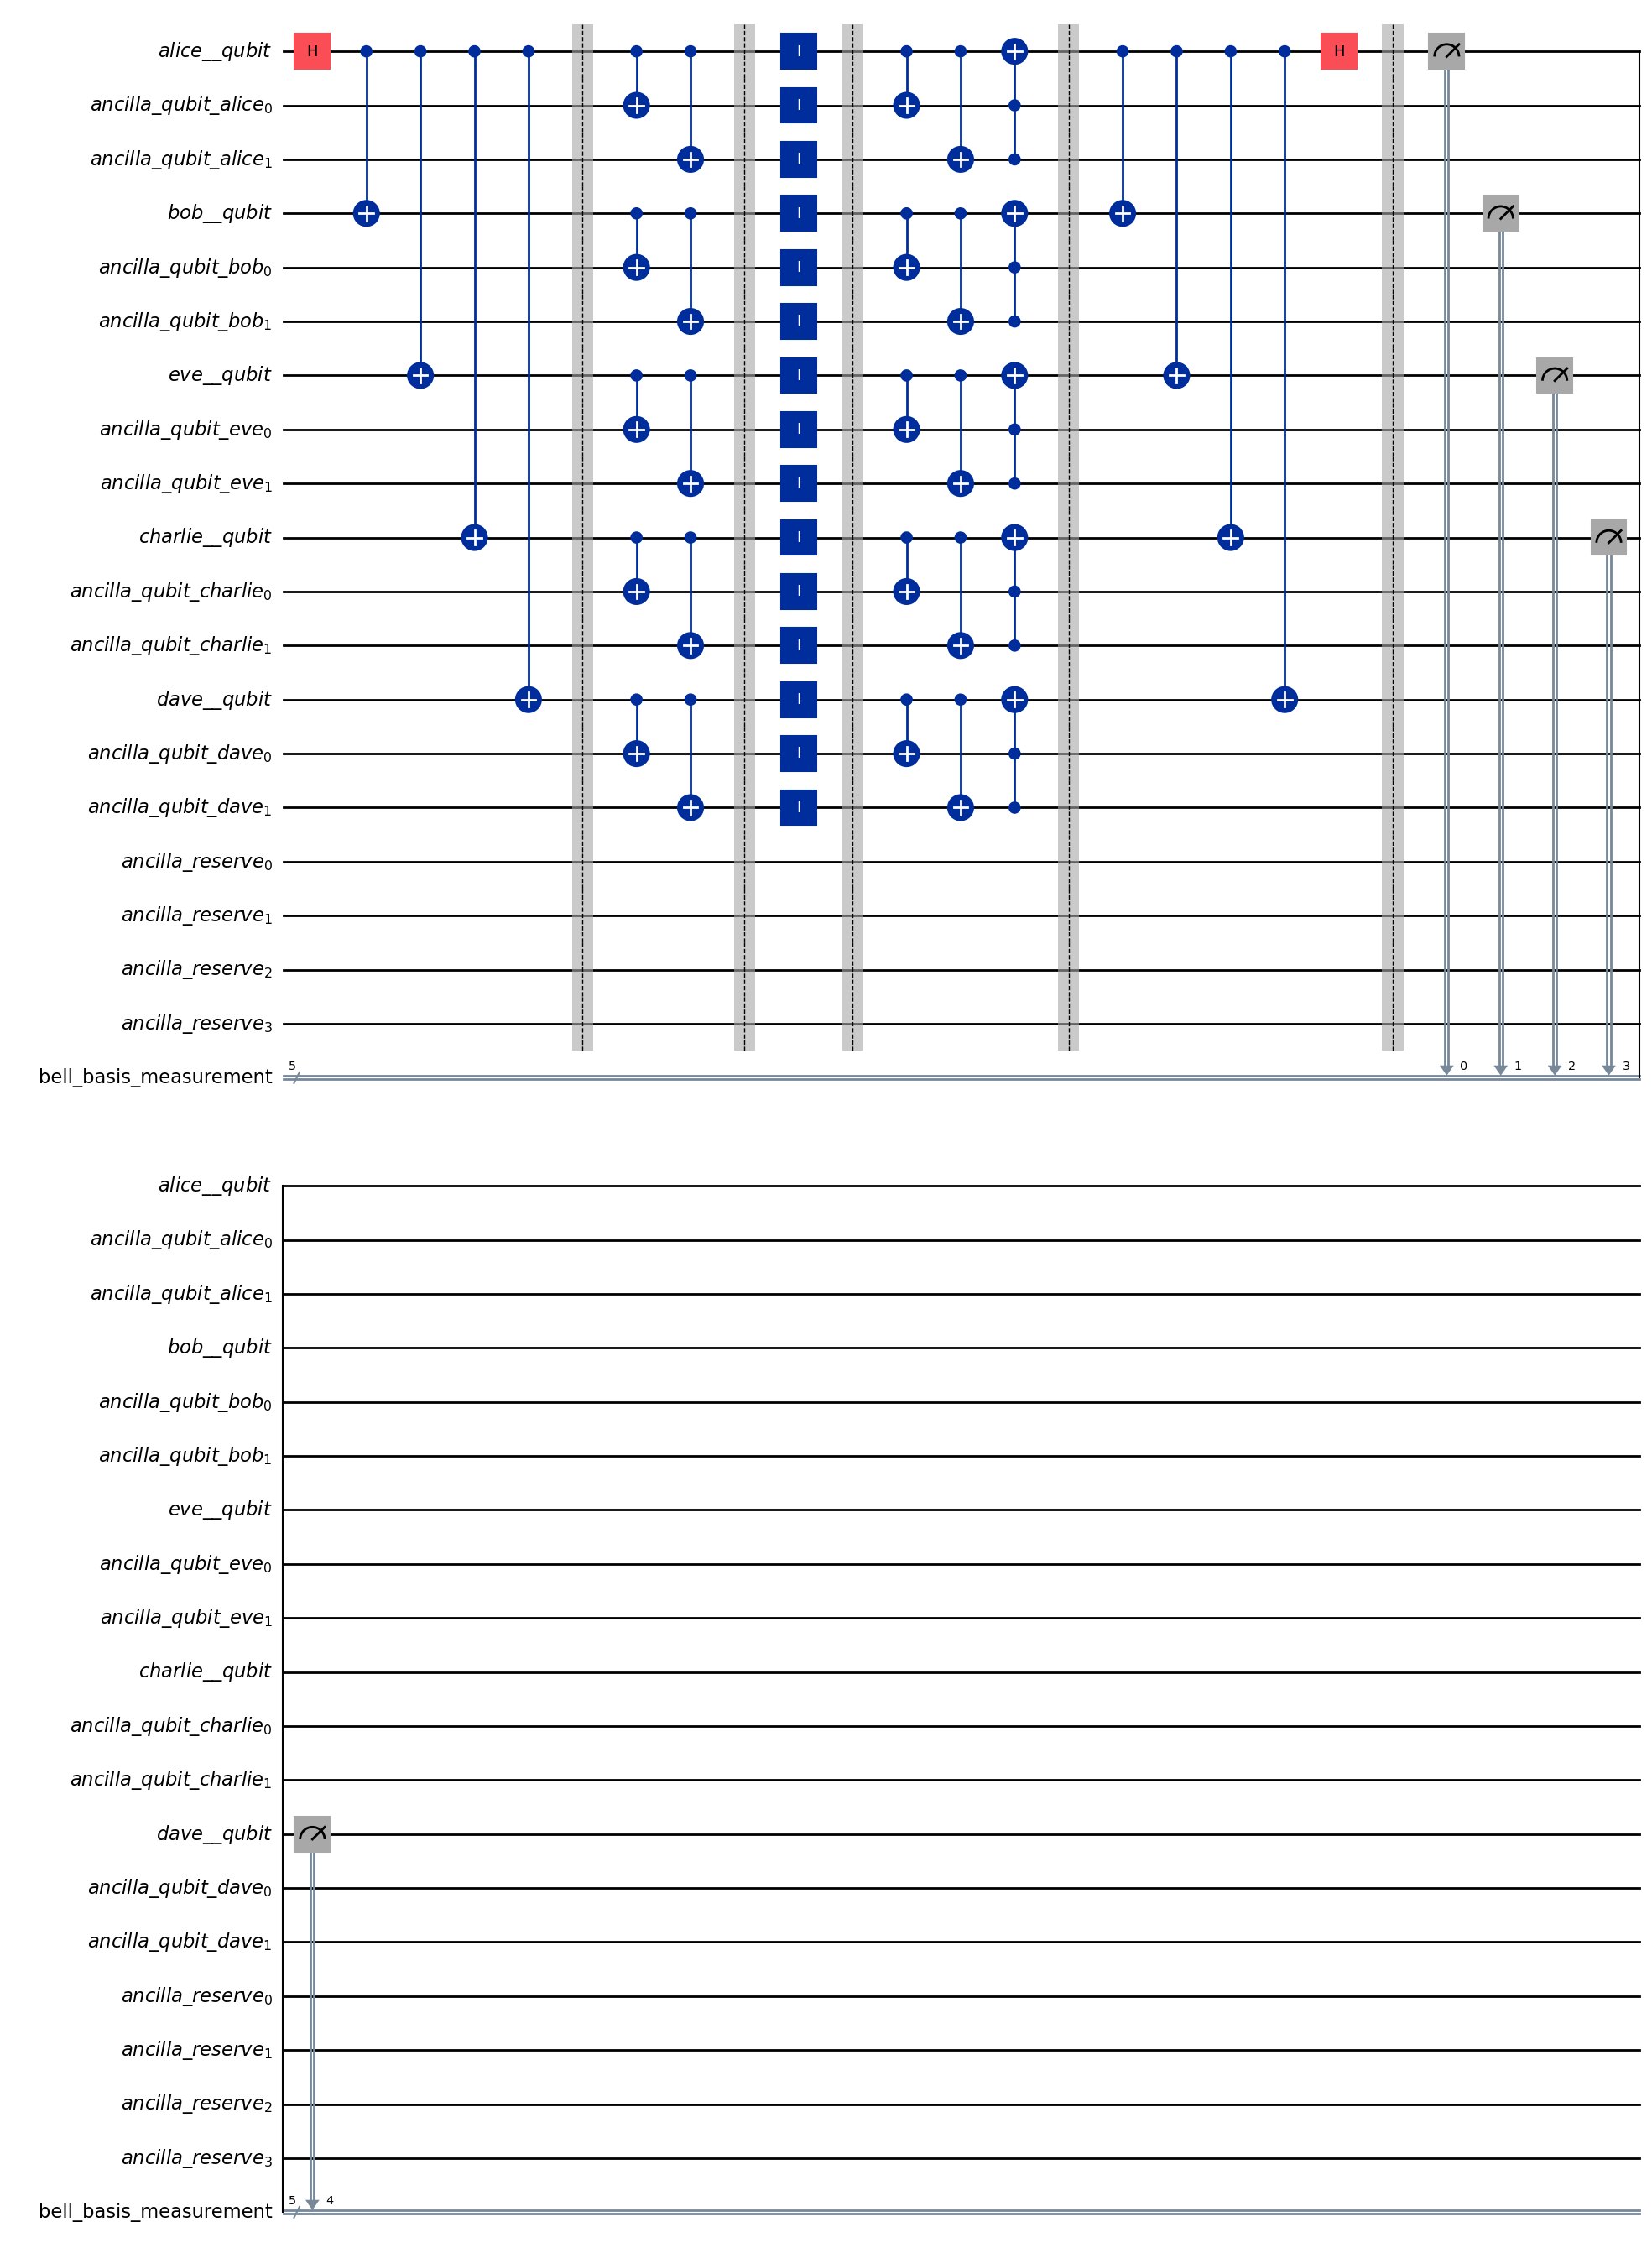

In [7]:
cr= ClassicalRegister(5,"bell_basis_measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
charlie= QuantumRegister(1, 'charlie__qubit')
dave= QuantumRegister(1, 'dave__qubit')
aq1= QuantumRegister(2, 'ancilla_qubit_alice')
aq2= QuantumRegister(2,'ancilla_qubit_bob')
aq3= QuantumRegister(2,'ancilla_qubit_eve')
aq4= QuantumRegister(2,'ancilla_qubit_charlie')
aq5= QuantumRegister(2,'ancilla_qubit_dave')
aq6= QuantumRegister(4,'ancilla_reserve')

repetition3 = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,charlie,aq4,dave,aq5,aq6,cr)

repetition3.h(alice)
repetition3.cx(alice,bob)
repetition3.cx(alice,eve)
repetition3.cx(alice,charlie)
repetition3.cx(alice,dave)

repetition3.barrier()
repetition3.cx(alice, aq1)
repetition3.cx(bob, aq2)
repetition3.cx(eve, aq3)
repetition3.cx(charlie, aq4)
repetition3.cx(dave, aq5)

repetition3.barrier()

repetition3.id(range(repetition3.num_qubits-4))
repetition3.barrier()

repetition3.cx(alice, aq1)
repetition3.cx(bob, aq2)
repetition3.cx(eve, aq3)
repetition3.cx(charlie, aq4)
repetition3.cx(dave, aq5)

repetition3.mcx([1,2],0)
repetition3.mcx([4,5],3)
repetition3.mcx([7,8],6)
repetition3.mcx([10,11],9)
repetition3.mcx([13,14],12)
repetition3.barrier()

# repetition3.cx(bob,alice)
# repetition3.cx(bob,eve)
# repetition3.cx(bob,charlie)
# repetition3.cx(bob,dave)
# repetition3.mcx([alice, eve, charlie], aq6[0])
# repetition3.mcx([alice, charlie, dave], aq6[0])
# repetition3.mcx([dave, eve, charlie], aq6[0])
# repetition3.mcx([alice, eve, charlie,dave], aq6[0])
# repetition3.cx(bob,alice)
# repetition3.cx(bob,eve)
# repetition3.cx(bob,charlie)
# repetition3.cx(bob,dave)
# repetition3.barrier()

# repetition3.cx(eve,alice)
# repetition3.cx(eve,bob)
# repetition3.cx(eve,charlie)
# repetition3.cx(eve,dave)
# repetition3.mcx([alice, bob, charlie], aq6[1])
# repetition3.mcx([alice, dave, charlie], aq6[1])
# repetition3.mcx([dave, bob, charlie], aq6[1])
# repetition3.mcx([alice, bob, charlie, dave], aq6[1])
# repetition3.cx(eve,alice)
# repetition3.cx(eve,bob)
# repetition3.cx(eve,charlie)
# repetition3.cx(eve,dave)
# repetition3.barrier()

# repetition3.cx(charlie,alice)
# repetition3.cx(charlie,bob)
# repetition3.cx(charlie,eve)
# repetition3.cx(charlie,dave)
# repetition3.mcx([alice, bob, eve], aq6[2])
# repetition3.mcx([alice, dave, eve], aq6[2])
# repetition3.mcx([dave, bob, eve], aq6[2])
# repetition3.mcx([alice, bob, eve, dave], aq6[2])
# repetition3.cx(charlie,alice)
# repetition3.cx(charlie,bob)
# repetition3.cx(charlie,eve)
# repetition3.cx(charlie,dave)
# repetition3.barrier()

# repetition3.cx(dave,alice)
# repetition3.cx(dave,bob)
# repetition3.cx(dave,eve)
# repetition3.cx(dave,charlie)
# repetition3.mcx([alice, bob, eve], aq6[3])
# repetition3.mcx([alice, charlie, eve], aq6[3])
# repetition3.mcx([charlie, bob, eve], aq6[3])
# repetition3.mcx([alice, bob, eve, charlie], aq6[3])
# repetition3.cx(dave,alice)
# repetition3.cx(dave,bob)
# repetition3.cx(dave,eve)
# repetition3.cx(dave,charlie)
# repetition3.barrier()

repetition3.cx(alice,bob)
repetition3.cx(alice,eve)
repetition3.cx(alice,charlie)
repetition3.cx(alice,dave)
# repetition3.mcx([bob, eve, charlie], alice)
# repetition3.mcx([bob, dave, charlie], alice)
# repetition3.mcx([dave, eve, charlie], alice)
# repetition3.mcx([bob, eve, charlie, dave], alice)
# repetition3.cx(aq6[0],bob)
# repetition3.cx(aq6[1],eve)
# repetition3.cx(aq6[2],charlie)
# repetition3.cx(aq6[3],dave)
repetition3.h(alice)
repetition3.barrier()

repetition3.measure([alice[0], bob[0], eve[0],charlie[0],dave[0]],cr)
repetition3.draw(output='mpl')

In [9]:
# Range of noise levels for one-qubit gates
noise_prob = np.linspace(0,1,30)
# params = 4*noise_prob/3
fidelities = []

for rate in noise_prob:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    bit_flip_error = pauli_error([('X',rate), ('I', 1-rate)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip_error, 'id')
    
    simulator = simulator = AerSimulator(method='matrix_product_state')
    circuit = transpile(repetition3, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(14):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 15 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['00000']
    fidelities.append(fidelity)

{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}
{'00000': 300.0}


In [5]:
print(fidelities)

[1.0, 0.9826666666666667, 0.938888888888889, 0.8675555555555555, 0.7846666666666667, 0.6906666666666667, 0.6077777777777779, 0.5424444444444444, 0.4904444444444444, 0.45933333333333337, 0.4384444444444444, 0.4202222222222222, 0.4351111111111111, 0.41800000000000004, 0.43, 0.4426666666666667, 0.44933333333333336, 0.4404444444444444, 0.4211111111111111, 0.43399999999999994, 0.4475555555555556, 0.4766666666666667, 0.5546666666666666, 0.6188888888888888, 0.6966666666666667, 0.7795555555555556, 0.8626666666666667, 0.9342222222222222, 0.9822222222222223, 1.0]


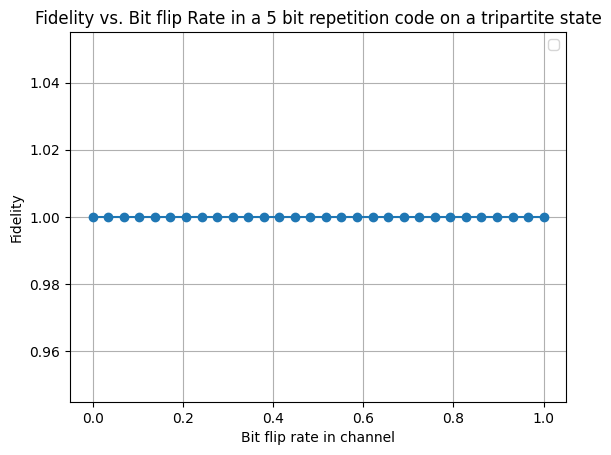

In [10]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities, sigma=1), marker='o')
xlabel('Bit flip rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Bit flip Rate in a 5 bit repetition code on a tripartite state')
grid()
legend()